## Renderer

In this tutorial, we will learn to use different modes of iGibson renderer, and the types of sensor simulation it can support.

## Overview
We developed our own MeshRenderer that supports customizable camera configuration and various image modalities, and renders at a lightening speed. Specifically, you can specify image width, height and vertical field of view in the constructor of `class MeshRenderer`. Then you can call `renderer.render(modes=('rgb', 'normal', 'seg', '3d', 'optical_flow', 'scene_flow'))` to retrieve the images. Currently we support six different image modalities: RGB, surface normal, segmentation, 3D point cloud (z-channel can be extracted as depth map), optical flow, and scene flow. We also support two types of LiDAR sensors: 1-beam and 16-beam (like Velodyne VLP-16). Most of the code can be found in [gibson2/render](https://github.com/StanfordVL/iGibson/tree/master/gibson2/render).


## Simple Example


In this example, we render an iGibson scene with a few lines of code. The code can be found in [gibson2/examples/demo/mesh_renderer_simple_example.py](https://github.com/StanfordVL/iGibson/blob/master/gibson2/examples/demo/mesh_renderer_simple_example.py).


### Load the 3D mesh model
Here we load the 3D mesh model

In [7]:
import cv2
import sys
import os
import numpy as np
from gibson2.render.mesh_renderer.mesh_renderer_cpu import MeshRenderer
from gibson2.utils.assets_utils import get_scene_path
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

model_path = os.path.join(get_scene_path('Rs'), 'mesh_z_up.obj')
renderer = MeshRenderer(width=512, height=512)
renderer.load_object(model_path)
renderer.add_instance(0)


INFO:root:Device 0 is available for rendering
INFO:root:Using device 0 for rendering
INFO:root:Loading /opt/igibson/gibson2/data/g_dataset/Rs/mesh_z_up.obj


### Render with different x,y position

In [8]:

def show_camera_image(x,y):
    camera_pose = np.array([x, y, 1.2])
    view_direction = np.array([1, 0, 0])
    renderer.set_camera(camera_pose, camera_pose + view_direction, [0, 0, 1])
    renderer.set_fov(90)
    frames = renderer.render(modes=('rgb', 'normal', '3d'))

    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow((frames[0] * 255).astype(np.uint8))
    plt.subplot(1,3,2)
    plt.imshow(frames[1])
    plt.subplot(1,3,3)
    plt.imshow(frames[2])

interactive_plot = interactive(show_camera_image, x=(-2.0, 2.0), y=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Render with different field of view

In [9]:

def show_camera_image(fov):
    camera_pose = np.array([0, 0, 1.2])
    view_direction = np.array([1, 0, 0])
    renderer.set_camera(camera_pose, camera_pose + view_direction, [0, 0, 1])
    renderer.set_fov(fov)
    frames = renderer.render(modes=('rgb', 'normal', '3d'))

    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow((frames[0] * 255).astype(np.uint8))
    plt.subplot(1,3,2)
    plt.imshow(frames[1])
    plt.subplot(1,3,3)
    plt.imshow(frames[2])

interactive_plot = interactive(show_camera_image, fov=(10,120))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=65, description='fov', max=120, min=10), Output(layout=Layout(height='35…

### Render with different view direction

In [10]:

def show_camera_image(vx, vy, vz):
    camera_pose = np.array([0, 0, 1.2])
    view_direction = np.array([vx, vy, vz])
    renderer.set_camera(camera_pose, camera_pose + view_direction, [0, 0, 1])
    renderer.set_fov(90)
    frames = renderer.render(modes=('rgb', 'normal', '3d'))

    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow((frames[0] * 255).astype(np.uint8))
    plt.subplot(1,3,2)
    plt.imshow(frames[1])
    plt.subplot(1,3,3)
    plt.imshow(frames[2])

interactive_plot = interactive(show_camera_image, vx = (-1.0, 1.0), vy = (-1.001, 1.0), vz = (-1.0, 1.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='vx', max=1.0, min=-1.0), FloatSlider(value=-0.000499…

## Physically base rendering

Physics Based Rendering: In iGibson, we include an open-source physics-based renderer, which implements an
approximation of BRDF models  with spatially varying
material maps including roughness, metallic and tangentspace surface normals. Let's see the PBR renderer in action:

In [11]:
from gibson2.render.mesh_renderer.mesh_renderer_settings import MeshRendererSettings

settings = MeshRendererSettings(msaa=True, enable_shadow=True)
renderer = MeshRenderer(width=512, height=512,  vertical_fov=70, rendering_settings=settings)
renderer.set_light_position_direction([0,0,10], [0,0,0])

i = 0

model_path = '/opt/igibson/gibson2/data/ig_dataset/objects/sink/sink_1/shape/visual'

for fn in os.listdir(model_path):
    if fn.endswith('obj'):
        renderer.load_object(os.path.join(model_path, fn), scale=[1, 1, 1])
        renderer.add_instance(i)
        i += 1

print(renderer.visual_objects, renderer.instances)
print(renderer.materials_mapping, renderer.mesh_materials)




INFO:root:Device 0 is available for rendering
INFO:root:Using device 0 for rendering
INFO:root:Loading /opt/igibson/gibson2/data/ig_dataset/objects/sink/sink_1/shape/visual/sink_1_m4_vm.obj
INFO:root:Loading /opt/igibson/gibson2/data/ig_dataset/objects/sink/sink_1/shape/visual/sink_1_m6_vm.obj
INFO:root:Loading /opt/igibson/gibson2/data/ig_dataset/objects/sink/sink_1/shape/visual/sink_1_m1_vm.obj
INFO:root:Loading /opt/igibson/gibson2/data/ig_dataset/objects/sink/sink_1/shape/visual/sink_1_m2_vm.obj
INFO:root:Loading /opt/igibson/gibson2/data/ig_dataset/objects/sink/sink_1/shape/visual/sink_1_m3_vm.obj


[Object(0)->VAO([0]), Object(1)->VAO([1]), Object(2)->VAO([2]), Object(3)->VAO([3]), Object(4)->VAO([4])] [Instance(0) -> Object(0), Instance(1) -> Object(1), Instance(2) -> Object(2), Instance(3) -> Object(3), Instance(4) -> Object(4)]
{0: Material(material_type: texture, texture_id: 22, metallic_texture_id:23, roughness_texture_id:24, normal_texture_id:25, color: [0.5, 0.5, 0.5]), 1: Material(material_type: color, texture_id: -1, metallic_texture_id:None, roughness_texture_id:None, normal_texture_id:None, color: [0.5, 0.5, 0.5]), 2: Material(material_type: texture, texture_id: 22, metallic_texture_id:23, roughness_texture_id:24, normal_texture_id:25, color: [0.5, 0.5, 0.5]), 3: Material(material_type: color, texture_id: -1, metallic_texture_id:None, roughness_texture_id:None, normal_texture_id:None, color: [0.5, 0.5, 0.5]), 4: Material(material_type: texture, texture_id: 22, metallic_texture_id:23, roughness_texture_id:24, normal_texture_id:25, color: [0.5, 0.5, 0.5]), 5: Material(ma

In [14]:
from PIL import Image
def show_camera_image(x,y,z):
    camera_pose = np.array([x,y,z])
    view_direction = np.array([-x, -y, -z])
    renderer.set_camera(camera_pose, camera_pose + view_direction, [0, 0, 1])
    renderer.set_fov(70)
    frames = renderer.render(modes=('rgb'))
    display(Image.fromarray(((frames[0][:,:,:3] * 255).astype(np.uint8))))
    #plt.figure()
    #plt.imshow((frames[0][:,:,:3] * 255).astype(np.uint8))

interactive_plot = interactive(show_camera_image, x=(-2.0, 2.0), y=(-2.0, 2.0), z=(-2.0, 2.0))
output = interactive_plot.children[-1]
output.layout.height = '512px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

From the above example, if you move around the camera, you should see the highlight on the sink change. 

### LiDAR simulation

LiDAR Sensing: Many real-world robots are equipped with LiDAR sensors for obstacle detection. In iGibson,
we support virtual LiDAR signals, with both 1 beam (e.g. Hokuyo) and 16 beams (e.g. Velodyne VLP-16).  Additionally, we provide the functionality to turn the 1D LiDAR scans into local occupancy maps,
which are bird’s-eye view images with three types of pixels indicating free, occupied, or unknown space. 

In [41]:
from gibson2.robots.turtlebot_robot import Turtlebot
from gibson2.simulator import Simulator
from gibson2.scenes.gibson_indoor_scene import StaticIndoorScene
from gibson2.objects.ycb_object import YCBObject
from gibson2.utils.utils import parse_config
from gibson2.render.mesh_renderer.mesh_renderer_settings import MeshRendererSettings
import numpy as np
from gibson2.render.profiler import Profiler
import gibson2
import os

In [42]:
config = parse_config(os.path.join(gibson2.example_config_path, 'turtlebot_demo.yaml'))
settings = MeshRendererSettings()
s = Simulator(mode='headless',
              image_width=256,
              image_height=256,
              rendering_settings=settings)

scene = StaticIndoorScene('Rs',
                          build_graph=True,
                          pybullet_load_texture=True)
s.import_scene(scene)
turtlebot = Turtlebot(config)
s.import_robot(turtlebot)

INFO:root:Device 0 is available for rendering
INFO:root:Using device 0 for rendering
INFO:root:IndoorScene model: Rs
INFO:root:StaticIndoorScene scene: Rs


******************PyBullet Logging Information:
PyBullet Logging Information******************


INFO:root:Loading traversable graph
INFO:root:Loading /opt/igibson/gibson2/data/g_dataset/Rs/mesh_z_up.obj
/opt/igibson/gibson2/render/mesh_renderer/mesh_renderer_cpu.py:461: RuntimeWarning: divide by zero encountered in true_divide
  delta_uv1[:, 1] * delta_uv2[:, 0])
/opt/igibson/gibson2/render/mesh_renderer/mesh_renderer_cpu.py:463: RuntimeWarning: invalid value encountered in multiply
  delta_pos2 * delta_uv1[:, 1][:, None]) * r[:, None]
/opt/igibson/gibson2/render/mesh_renderer/mesh_renderer_cpu.py:465: RuntimeWarning: invalid value encountered in multiply
  delta_pos1 * delta_uv2[:, 0][:, None]) * r[:, None]
INFO:root:Loading robot model file: turtlebot/turtlebot.urdf
INFO:root:Loading /opt/igibson/gibson2/data/assets/models/turtlebot/kobuki_description/meshes/main_body.obj
INFO:root:Loading /opt/igibson/gibson2/data/assets/models/mjcf_primitives/cube.obj
INFO:root:Loading /opt/igibson/gibson2/data/assets/models/turtlebot/kobuki_description/meshes/wheel.obj
INFO:root:Loading /opt

(17,)

<IPython.core.display.Javascript object>


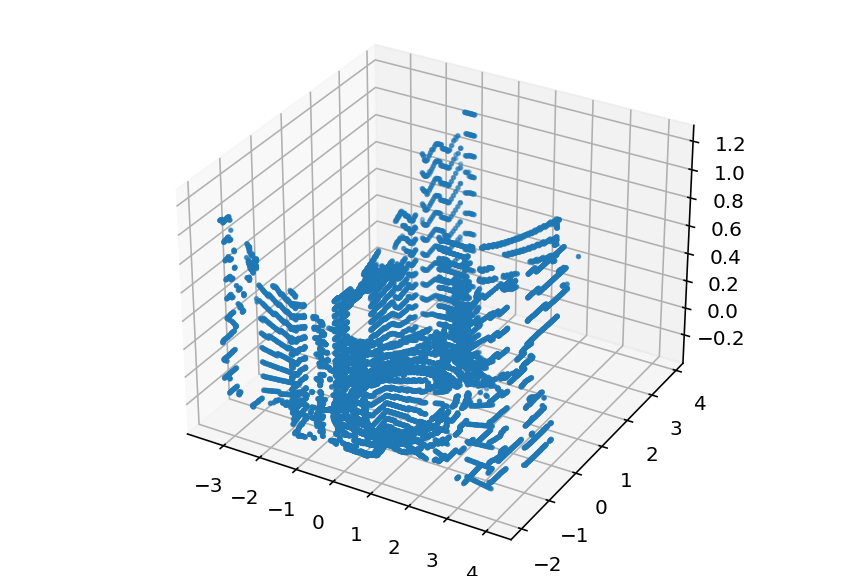

In [48]:
lidar = s.renderer.get_lidar_all()
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lidar[:,0], lidar[:,2], lidar[:,1], s=3)


You should be able to rotate and observe the lidar point cloud simulated by iGibson renderer.